In [1]:
import esoreader as eso
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio

import os

pd.options.plotting.backend = "plotly"
pio.renderers.default = 'iframe'

os.getcwd()

'/efficientIO/ai/testing'

In [20]:
f = eso.read_from_path(r"../../../Eplus-env-unitary_heat_only-const-heating-res134/Eplus-env-sub_run2/output/eplusout.eso")
print(f.find_variable("TimeStep"))


[]


In [3]:
f.to_frame("System Node Temperature")


,US 1 HEATING COIL OUTLET,US 1 SUPPLY FAN OUTLET,SPACE1-1 ZONE EQUIP INLET
0,24.391627,15.663888,24.391627
1,24.394202,15.656036,24.394202
2,24.391473,15.647103,24.391473
3,24.384134,15.636825,24.384134
4,24.372315,15.625108,24.372315
...,...,...,...
2871,22.517002,15.467987,22.517002
2872,22.508627,15.470760,22.508627
2873,22.500215,15.473507,22.500215
2874,22.491771,15.476224,22.491771


In [4]:
def create_dataframe_from_eso(eso_file):

    df_temp = pd.DataFrame()
    df_control = pd.DataFrame()
    
    df_outdoor_temp = eso_file.to_frame("Site Outdoor Air Drybulb Temperature")
    df_outdoor_temp.columns = ["Outdoor Temp."]
    
    df_indoor_temp = eso_file.to_frame("Zone Air Temperature")
    df_indoor_temp.columns = ["Indoor Temp."]

    df_heat_coil = eso_file.to_frame("Heating Coil Heating Energy")
    df_heat_coil.columns = ["Heating Coil Energy"]
    df_heat_coil["Heating Coil Energy"] = df_heat_coil["Heating Coil Energy"]/1000000

    df_boiler_out = eso_file.to_frame("Boiler Outlet Temperature")
    df_boiler_out.columns = ["Boiler Outlet Temp"]

    df_solar_dir = eso_file.to_frame("Site Direct Solar Radiation Rate per Area")
    df_solar_dir.columns = ["Direct Solar"]
    df_solar_dir["Direct Solar"] = df_solar_dir["Direct Solar"]/30


    df_people = eso_file.to_frame("Zone People Occupant Count")
    df_people.columns = ["People count"]
    #df_people["Direct Solar"] = df_people["Direct Solar"]/30



    df_fan_energy = eso_file.to_frame("Fan Electricity Energy")
    df_fan_energy.columns = ["Supply Fan Energy"]


    '''
    df_fan_flow = eso_file.to_frame("Fan Air Mass Flow Rate")
    df_fan_flow.columns = ["Fan flow rate"]
    
    df_heating_therm = eso_file.to_frame("Zone Thermostat Heating Setpoint Temperature")
    df_heating_therm.columns = ["Heating Thermostat"]

    df_heat_rate = eso_file.to_frame("Heating Coil Heating Rate")
    df_heat_rate.columns = ["Heating Coil rate"]
    df_heat_rate["Heating Coil rate"] = df_heat_rate["Heating Coil rate"]/100
    
    df_heat_u = eso_file.to_frame("Heating Coil U Factor Times Area Value")
    df_heat_u.columns = ["Heating Coil U Faktor"]
    #df_heat_u["Heating Coil U Faktor"] = df_heat_u["Heating Coil U Faktor"]

    df_heat_s = eso_file.to_frame("Heating Coil Source Side Heat Transfer Energy")
    df_heat_s.columns = ["Heating Coil transfer"]
    df_heat_s["Heating Coil transfer"] = df_heat_s["Heating Coil transfer"]/100000


    df_cool_coil = eso_file.to_frame("Cooling Coil Total Cooling Energy")
    df_cool_coil.columns = ["Cooling Coil Energy"]
    df_cool_coil["Cooling Coil Energy"] = df_cool_coil["Cooling Coil Energy"]/10000

    df_cooling_therm = eso_file.to_frame("Zone Thermostat Cooling Setpoint Temperature")
    df_cooling_therm.columns = ["Cooling Thermostat"]

    

    df_tower_out = eso_file.to_frame("Cooling Tower Outlet Temperature")
    df_tower_out.columns = ["Tower Outlet Temp"]

    
    df_temp = pd.concat([df_outdoor_temp,df_indoor_temp,df_boiler_out,df_heat_rate,df_heat_s, df_heat_u,df_cooling_therm, df_heating_therm, df_fan_energy,df_heat_coil, df_tower_out, df_cool_coil, df_solar_dir, df_people, df_fan_flow], axis=1)
    '''

    df_terminal_temp = eso_file.to_frame("System Node Temperature")
    #df_terminal_temp.columns = ["Terminal Temp"]

    df_terminal_vol = eso_file.to_frame("System Node Current Density Volume Flow Rate")
    df_terminal_vol.columns = ["Terminal Volume"]

    df_terminal_dens = eso_file.to_frame("System Node Current Density")
    df_terminal_dens.columns = ["Terminal Density"]
    
    df_temp = pd.concat([df_terminal_temp, df_terminal_vol, df_terminal_dens, df_outdoor_temp,df_indoor_temp,df_boiler_out, df_heat_coil, df_solar_dir, df_people,df_fan_energy], axis=1)

    return df_temp

In [5]:
from datetime import datetime, timedelta

def apply_dates(df, start_date, interval):

    print(interval*len(df))
    end_date = start_date + timedelta(minutes=interval*len(df)-1)
    
    
    # Create a DatetimeIndex with 15-minute intervals
    date_range = pd.date_range(start=start_date, end=end_date, freq=f"{interval}T")
    
    df.index = date_range
    
    return df


In [9]:
#### current
f = eso.read_from_path(r"Eplus-env-5zone_unitary_heat_only-const-heating-res196/Eplus-env-sub_run2/output/eplusout.eso")

df_temps = create_dataframe_from_eso(f)
print(df_temps["Indoor Temp."].describe())

print(len(df_temps))


df_temps = df_temps[0:24*7*30]
df_temps["ctrl"] = 23

#Define the start and end datetime values
start_date = pd.to_datetime('2008-10-01 00:00:00')
interval = 1

df_temps = apply_dates(df_temps, start_date, interval)
    
#add DataFrames to subplots
df_temps.plot()


count    7192.000000
mean       20.770917
std         1.252371
min        19.616795
25%        19.991588
50%        20.008200
75%        22.110599
max        23.066049
Name: Indoor Temp., dtype: float64
7193
5040


In [7]:
#### current
f = eso.read_from_path(r"Eplus-env-5zone_unitary_heat_only-const-heating-res130/Eplus-env-sub_run55/output/eplusout.eso")

df_temps = create_dataframe_from_eso(f)
print(df_temps["Indoor Temp."].describe())

print(len(df_temps))


df_temps = df_temps[0:24*7*30]
df_temps["ctrl"] = 23

#Define the start and end datetime values
start_date = pd.to_datetime('2008-10-01 00:00:00')
interval = 2

df_temps = apply_dates(df_temps, start_date, interval)
    
#add DataFrames to subplots
df_temps.plot()


count    5040.000000
mean       21.692492
std         1.802907
min        19.581160
25%        20.004900
50%        21.436503
75%        22.982736
max        26.255571
Name: Indoor Temp., dtype: float64
5040
10080


In [16]:
#### current
f = eso.read_from_path(r"Eplus-env-5zone_unitary_heat_only-const-heating-res77/Eplus-env-sub_run2/output/eplusout.eso")

df_temps = create_dataframe_from_eso(f)
print(df_temps["Indoor Temp."].describe())

print(len(df_temps))


df_temps = df_temps[0:24*7*30]
df_temps["ctrl"] = 20

#Define the start and end datetime values
start_date = pd.to_datetime('2008-10-01 00:00:00')
interval = 2

df_temps = apply_dates(df_temps, start_date, interval)
    
#add DataFrames to subplots
df_temps.plot()


count    3592.000000
mean       20.726449
std         1.275816
min        19.140780
25%        19.905125
50%        20.055733
75%        22.022964
max        23.351680
Name: Indoor Temp., dtype: float64
3592
7184


In [20]:
#### test delete
f = eso.read_from_path(r"../../../Eplus-env-unitary_heat_only-const-heating-res136/Eplus-env-sub_run2/output/eplusout.eso")

df_temps = create_dataframe_from_eso(f)
print(df_temps["Indoor Temp."].describe())

df_temps = df_temps[0:24*50*30]
df_temps["ctrl"] = 23

#Define the start and end datetime values
start_date = pd.to_datetime('2018-01-01 00:00:00')
end_date = pd.to_datetime('2018-01-04 23:46:00')
interval = "2T"

df_temps = apply_dates(df_temps, start_date, end_date, interval)
    
#add DataFrames to subplots
df_temps.plot()


count    2874.000000
mean       22.666084
std         1.334528
min        18.810221
25%        22.333071
50%        22.971068
75%        23.203707
max        25.547066
Name: Indoor Temp., dtype: float64


In [26]:
# PID ~1,0,0
eso_path = r"../../../Eplus-env-unitary_heat_only-const-heating-res44/Eplus-env-sub_run2/output/eplusout.eso"


f = eso.read_from_path(eso_path)
df_temps = create_dataframe_from_eso(f)
print(df_temps["Indoor Temp."].describe())

df_temps = df_temps[0:24*4*4]
df_temps["ctrl"] = 23

# Define the start and end datetime values
start_date = pd.to_datetime('2018-01-01 00:00:00')
end_date = pd.to_datetime('2018-01-04 18:15:00')
interval = "15T"

df_temps = apply_dates(df_temps, start_date, end_date, interval)
    
#add DataFrames to subplots
df_temps.plot()


ValueError: Length mismatch: Expected axis has 0 elements, new values have 1 elements

In [39]:
#
eso_path = r"../../../Eplus-env-unitary_heat_only-const-heating-res34/Eplus-env-sub_run2/output/eplusout.eso"


f = eso.read_from_path(eso_path)
df_temps = create_dataframe_from_eso(f)
print(df_temps["Indoor Temp."].describe())

df_temps = df_temps[0:24*4*4]

# Define the start and end datetime values
start_date = pd.to_datetime('2018-01-01 00:00:00')
end_date = pd.to_datetime('2018-01-04 23:45:00')
interval = "15T"

df_temps = apply_dates(df_temps, start_date, end_date, interval)
    
#add DataFrames to subplots
df_temps.plot()


count    385.000000
mean      25.017708
std        1.394764
min       19.351567
25%       24.218914
50%       25.261004
75%       26.070125
max       27.715621
Name: Indoor Temp., dtype: float64


In [12]:
#current
eso_path = r"../../../Eplus-env-unitary_heat_only-const-heating-res28/Eplus-env-sub_run2/output/eplusout.eso"


f = eso.read_from_path(eso_path)
df_temps = create_dataframe_from_eso(f)

df_temps = df_temps[0:24*4*4]

# Define the start and end datetime values
start_date = pd.to_datetime('2018-01-01 00:00:00')
end_date = pd.to_datetime('2018-01-04 17:15:00')
interval = "15T"

df_temps = apply_dates(df_temps, start_date, end_date, interval)
    
#add DataFrames to subplots
df_temps.plot()


In [30]:
df_indoor_temp = f.to_frame("Zone Air Temperature")

df_indoor_temp.describe()

,SPACE1-1
count,385.000000
mean,25.017708
std,1.394764
min,19.351567
25%,24.218914
50%,25.261004
75%,26.070125
max,27.715621


In [24]:
# for VAV system

def create_dataframe_from_eso(eso_file):

    df_temp = pd.DataFrame()
    df_control = pd.DataFrame()
    
    df_outdoor_temp = eso_file.to_frame("Site Outdoor Air Drybulb Temperature")
    df_outdoor_temp.columns = ["Outdoor Temp."]
    
    df_indoor_temp = eso_file.to_frame("Zone Air Temperature")
    df_indoor_temp.columns = ["Indoor Temp."]
    
    df_heating_therm = eso_file.to_frame("Zone Thermostat Heating Setpoint Temperature")
    df_heating_therm.columns = ["Heating Thermostat"]

    df_heat_coil = eso_file.to_frame("Heating Coil Heating Energy")
    df_heat_coil.columns = ["Heating Coil Energy"]
    df_heat_coil["Heating Coil Energy"] = df_heat_coil["Heating Coil Energy"]/100000

    df_heat_rate = eso_file.to_frame("Heating Coil Heating Rate")
    df_heat_rate.columns = ["Heating Coil rate"]
    df_heat_rate["Heating Coil rate"] = df_heat_rate["Heating Coil rate"]/100
    
    df_heat_u = eso_file.to_frame("Heating Coil U Factor Times Area Value")
    df_heat_u.columns = ["Heating Coil U Faktor"]
    #df_heat_u["Heating Coil U Faktor"] = df_heat_u["Heating Coil U Faktor"]

    df_heat_s = eso_file.to_frame("Heating Coil Source Side Heat Transfer Energy")
    df_heat_s.columns = ["Heating Coil transfer"]
    df_heat_s["Heating Coil transfer"] = df_heat_s["Heating Coil transfer"]/100000


    df_cool_coil = eso_file.to_frame("Cooling Coil Total Cooling Energy")
    df_cool_coil.columns = ["Cooling Coil Energy"]
    df_cool_coil["Cooling Coil Energy"] = df_cool_coil["Cooling Coil Energy"]/10000

    df_cooling_therm = eso_file.to_frame("Zone Thermostat Cooling Setpoint Temperature")
    df_cooling_therm.columns = ["Cooling Thermostat"]

    df_boiler_out = eso_file.to_frame("Boiler Outlet Temperature")
    df_boiler_out.columns = ["Boiler Outlet Temp"]

    df_tower_out = eso_file.to_frame("Cooling Tower Outlet Temperature")
    df_tower_out.columns = ["Tower Outlet Temp"]

    df_solar_dir = eso_file.to_frame("Site Direct Solar Radiation Rate per Area")
    df_solar_dir.columns = ["Direct Solar"]
    df_solar_dir["Direct Solar"] = df_solar_dir["Direct Solar"]/30

    df_people = eso_file.to_frame("Zone People Occupant Count")
    df_people.columns = ["People count"]
    #df_people["Direct Solar"] = df_people["Direct Solar"]/30

    df_fan_flow = eso_file.to_frame("Fan Air Mass Flow Rate")
    df_fan_flow.columns = ["Fan flow rate"]


    df_fan_energy = eso_file.to_frame("Fan Electricity Energy")
    df_fan_energy.columns = ["Supply Fan Energy"]
    
    df_temp = pd.concat([df_outdoor_temp,df_indoor_temp,df_boiler_out,df_heat_rate,df_heat_s, df_heat_u,df_cooling_therm, df_heating_therm, df_fan_energy,df_heat_coil, df_tower_out, df_cool_coil, df_solar_dir, df_people, df_fan_flow], axis=1)

       
    
    return df_temp

In [5]:

# VAV output
eso_path = r"../../../Eplus-env-factory-const-heating-res35/Eplus-env-sub_run2/output/eplusout.eso"


f = eso.read_from_path(eso_path)
df_temps = create_dataframe_from_eso(f)

df_temps = df_temps[0:24*4*4]

# Define the start and end datetime values
start_date = pd.to_datetime('2018-01-01 00:00:00')
end_date = pd.to_datetime('2018-01-04 23:30:00')
interval = "15T"

df_temps = apply_dates(df_temps, start_date, end_date, interval)
    
#add DataFrames to subplots
df_temps.plot()

# Why do cooling and heating coil change? Based on which time?
# Why does room temperature not change with heating or coolin coil activity? What else is there
# Why is Boiler Water Outlet not always 90 since we always set it to this value! 



## Room Temperature stays the same when boiler temp is changed. Supply fan constant and same

In [50]:


eso_path = r"../../../Eplus-env-factory-const-heating-res20/Eplus-env-sub_run2/output/eplusout.eso"


f = eso.read_from_path(eso_path)
df_temps = create_dataframe_from_eso(f)

df_temps = df_temps[0:24*4*4]

# Define the start and end datetime values
start_date = pd.to_datetime('2018-01-01 00:00:00')
end_date = pd.to_datetime('2018-01-04 19:30:00')
interval = "15T"

df_temps = apply_dates(df_temps, start_date, end_date, interval)
    
#add DataFrames to subplots
df_temps.plot()


In [49]:


eso_path = r"../../../Eplus-env-factory-const-heating-res16/Eplus-env-sub_run2/output/eplusout.eso"


f = eso.read_from_path(eso_path)
df_temps = create_dataframe_from_eso(f)

df_temps = df_temps[0:24*4*4]

# Define the start and end datetime values
start_date = pd.to_datetime('2018-01-01 00:00:00')
end_date = pd.to_datetime('2018-01-04 22:00:00')
interval = "15T"

df_temps = apply_dates(df_temps, start_date, end_date, interval)
    
#add DataFrames to subplots
df_temps.plot()


In [40]:


eso_path = r"../../../Eplus-env-factory-const-heating-res12/Eplus-env-sub_run2/output/eplusout.eso"


f = eso.read_from_path(eso_path)
df_temps = create_dataframe_from_eso(f)

df_temps = df_temps[0:24*4*4]

# Define the start and end datetime values
start_date = pd.to_datetime('2018-01-01 00:00:00')
end_date = pd.to_datetime('2018-01-04 22:00:00')
interval = "15T"

df_temps = apply_dates(df_temps, start_date, end_date, interval)
    
#add DataFrames to subplots
df_temps.plot()


In [39]:
# Full Heating (1,-1)

eso_path = r"../../../Eplus-env-factory-const-heating-res13/Eplus-env-sub_run2/output/eplusout.eso"


f = eso.read_from_path(eso_path)
df_temps = create_dataframe_from_eso(f)

df_temps = df_temps[0:24*4*4]

# Define the start and end datetime values
start_date = pd.to_datetime('2018-01-01 00:00:00')
end_date = pd.to_datetime('2018-01-04 22:00:00')
interval = "15T"

df_temps = apply_dates(df_temps, start_date, end_date, interval)
    
#add DataFrames to subplots
df_temps.plot()


# Dokumentation - Don't Delete

In [90]:
# Full Heating (1,-1)

eso_path = r"../../../Eplus-env-factory-const-heating-res32/Eplus-env-sub_run2/output/eplusout.eso"


f = eso.read_from_path(eso_path)
df_temps = create_dataframe_from_eso(f)

df_temps = df_temps[0:24*4*4]

# Define the start and end datetime values
start_date = pd.to_datetime('2018-01-01 00:00:00')
end_date = pd.to_datetime('2018-01-04 21:45:00')
interval = "15T"

df_temps = apply_dates(df_temps, start_date, end_date, interval)
    
#add DataFrames to subplots
df_temps.plot()


In [8]:
# Heating Normal

# See that trial 3 is the best! Where PID~(1,0,0)

eso_path = r"../../../Eplus-env-factory-const-heating-res24/Eplus-env-sub_run2/output/eplusout.eso"


f = eso.read_from_path(eso_path)
df_temps = create_dataframe_from_eso(f)

df_temps = df_temps[0:24*4*4]

# Define the start and end datetime values
start_date = pd.to_datetime('2018-01-01 00:00:00')
end_date = pd.to_datetime('2018-01-04 21:30:00')
interval = "15T"

df_temps = apply_dates(df_temps, start_date, end_date, interval)
    
#add DataFrames to subplots
df_temps.plot()


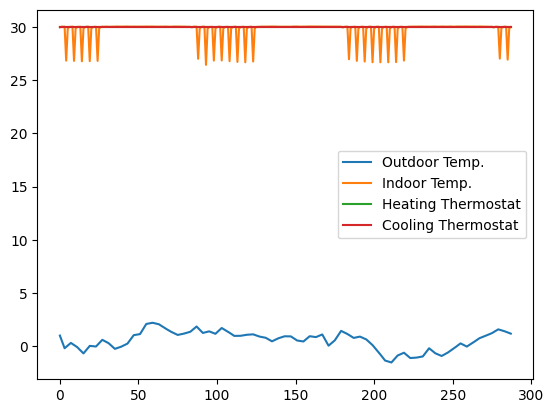

In [8]:
# sinergym heating/cooling = [1,-1] -> Full heat at 60 degree! 

eso_path = r"../../..//Eplus-env-factory-const-heating-res1/Eplus-env-sub_run2/output/eplusout.eso"
get_plot(eso_path)


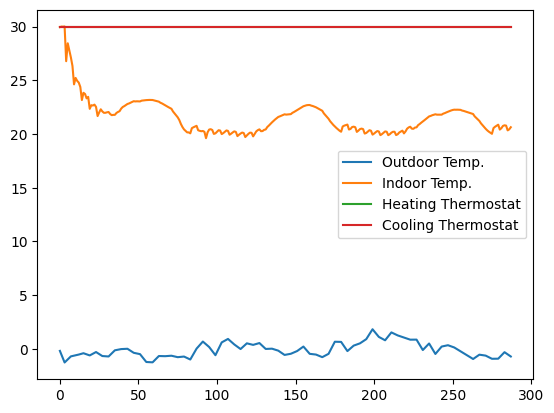

In [9]:
# sinergym heating/cooling = [-1,0] -> Full cool degree! 

eso_path = r"../../../Eplus-env-factory-const-heating-res2/Eplus-env-sub_run2/output/eplusout.eso"
get_plot(eso_path)


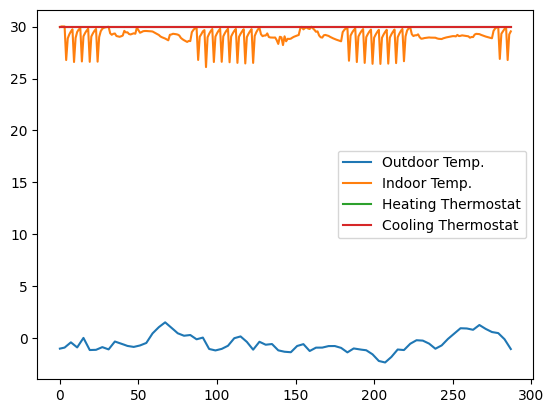

In [10]:
# sinergym heating/cooling = [0,0]

eso_path = r"../../../Eplus-env-factory-const-heating-res3/Eplus-env-sub_run2/output/eplusout.eso"
get_plot(eso_path)
